<a href="https://colab.research.google.com/github/mmorra13/Intro-To-ML/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#PROBLEM 1
# Load the diabetes dataset
file_path1 = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(file_path1))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Split the dataset into inputs/output
X1 = diabetes.iloc[:, 0:8]
Y1 = diabetes.iloc[:, 8]

In [4]:
#Split the dataset into training and test, 80-20 split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)

In [5]:
#Input standardization
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [6]:
#Make instance of classifier of the object LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X1_train,Y1_train)

LogisticRegression(random_state=0)

In [7]:
#Predictions for test set
Y1_pred = classifier.predict(X1_test)

In [8]:
#Accuracy, precision, recall, and F1 score
print("Accuracy:",metrics.accuracy_score(Y1_test, Y1_pred))
print("Precision:",metrics.precision_score(Y1_test, Y1_pred))
print("Recall:",metrics.recall_score(Y1_test, Y1_pred))
print("F1 Score:",metrics.f1_score(Y1_test, Y1_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


Text(0.5, 427.9555555555555, 'Predicted label')

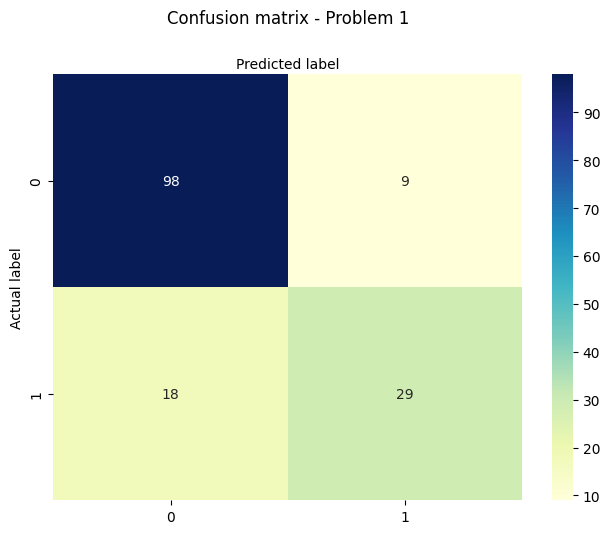

In [9]:
#Visualization of confusion matrix using heatmap
cnf_matrix1 = confusion_matrix(Y1_test,Y1_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Problem 1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
#PROBLEM 2a
# Load the cancer dataset
file_path2 = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path2))
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
varlist = ['diagnosis']
#Defining map function
def binary_map(x):
  return x.map({'B': 1, 'M': 0})

#Applying the function to the cancer dataset
#Malignant becomes 0, Benign becomes 1
cancer[varlist] = cancer[varlist].apply(binary_map)

In [12]:
#Split the dataset into inputs/output
X2 = cancer.iloc[:, 2:32]
Y2 = cancer.iloc[:, 1]

In [13]:
#Split the dataset into training and test, 80-20 split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

In [14]:
#Input standardization
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [15]:
#Fit to logistic regression model
classifier.fit(X2_train,Y2_train)

LogisticRegression(random_state=0)

In [16]:
#Predictions for test set
Y2a_pred = classifier.predict(X2_test)

In [17]:
#Accuracy, precision, recall, and F1 score
print("Accuracy:",metrics.accuracy_score(Y2_test, Y2a_pred))
print("Precision:",metrics.precision_score(Y2_test, Y2a_pred))
print("Recall:",metrics.recall_score(Y2_test, Y2a_pred))
print("F1 Score:",metrics.f1_score(Y2_test, Y2a_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433


Text(0.5, 427.9555555555555, 'Predicted label')

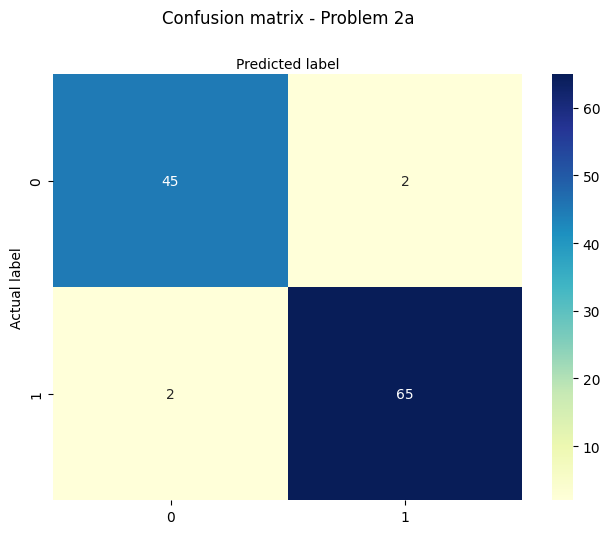

In [18]:
#Visualization of confusion matrix using heatmap
cnf_matrix2 = confusion_matrix(Y2_test,Y2a_pred)
class_names=['M','B'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Problem 2a', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
#PROBLEM 2b
#Define instance of logistic regression classifier using a penalty C=0.1 (Experiment with different values to find best result)
penalty_classifier = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
#Fit data to logistic regression with penalty model
penalty_classifier.fit(X2_train,Y2_train)
#Predictions for test set
Y2b_pred = penalty_classifier.predict(X2_test)

In [20]:
#Accuracy, precision, recall, and F1 score
print("Accuracy:",metrics.accuracy_score(Y2_test, Y2b_pred))
print("Precision:",metrics.precision_score(Y2_test, Y2b_pred))
print("Recall:",metrics.recall_score(Y2_test, Y2b_pred))
print("F1 Score:",metrics.f1_score(Y2_test, Y2b_pred))

Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716
F1 Score: 0.9777777777777777


Text(0.5, 427.9555555555555, 'Predicted label')

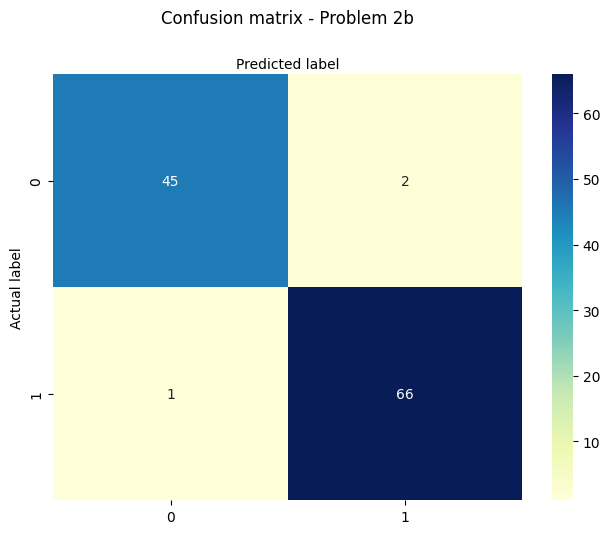

In [21]:
#Visualization of confusion matrix using heatmap
cnf_matrix2 = confusion_matrix(Y2_test,Y2b_pred)
class_names=['M','B'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Problem 2b', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
#PROBLEM 3
#Create instance for gaussian naive bayesian model
model = GaussianNB()
#Fit training dataset to model
model.fit(X2_train,Y2_train)
#Make predictions for test set
Y3_pred = model.predict(X2_test)

In [23]:
#Accuracy, precision, recall, and F1 score
print("Accuracy:",metrics.accuracy_score(Y2_test, Y3_pred))
print("Precision:",metrics.precision_score(Y2_test, Y3_pred))
print("Recall:",metrics.recall_score(Y2_test, Y3_pred))
print("F1 Score:",metrics.f1_score(Y2_test, Y3_pred))

Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


Text(0.5, 427.9555555555555, 'Predicted label')

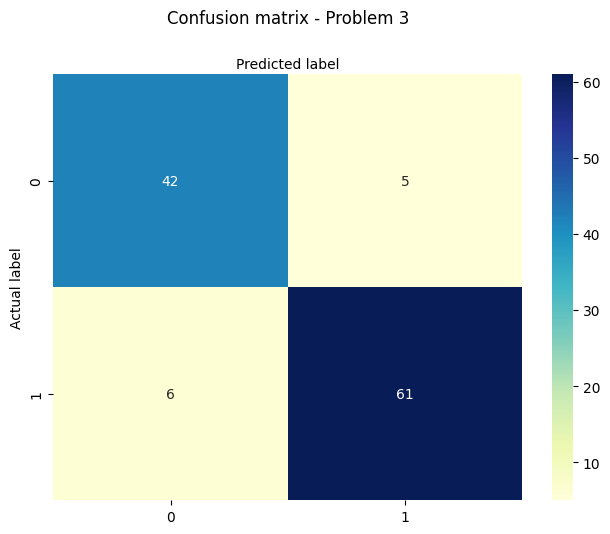

In [24]:
#Visualization of confusion matrix using heatmap
cnf_matrix2 = confusion_matrix(Y2_test,Y3_pred)
class_names=['M','B'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Problem 3', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
#PROBLEM 4
#Using inputs and outputs before 80-20 split and before input standardization
X4 = X2
Y4 = Y2
#Input standardization
X4 = sc.fit_transform(X4)
K = [1, 2, 3, 4, 5, 6] #Test up to 6 principal components, increase if needed for greater accuracy
for k in K:
  pca = PCA(n_components = k) #Create PCA instance with k components
  principalComponents = pca.fit_transform(X4)   #Fit the data
  X4pca_train, X4pca_test, Y4_train, Y4_test = train_test_split(principalComponents, Y4, test_size = 0.2, random_state = 0) #Split the dataset into training and test, 80-20 split
  classifier.fit(X4pca_train,Y4_train) #Fit the pca components and outputs of training set to logistic regression model
  Y4_pred = classifier.predict(X4pca_test) #Predictions for test set
  #Accuracy, precision, recall, and F1 score
  print('K =', k)
  print("Accuracy:",metrics.accuracy_score(Y4_test, Y4_pred))
  print("Precision:",metrics.precision_score(Y4_test, Y4_pred))
  print("Recall:",metrics.recall_score(Y4_test, Y4_pred))
  print("F1 Score:",metrics.f1_score(Y4_test, Y4_pred))
  print('')
#K = 5 appears to have best results

K = 1
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067

K = 2
Accuracy: 0.9298245614035088
Precision: 0.9682539682539683
Recall: 0.9104477611940298
F1 Score: 0.9384615384615386

K = 3
Accuracy: 0.9122807017543859
Precision: 0.9384615384615385
Recall: 0.9104477611940298
F1 Score: 0.9242424242424243

K = 4
Accuracy: 0.9473684210526315
Precision: 0.9552238805970149
Recall: 0.9552238805970149
F1 Score: 0.9552238805970149

K = 5
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963

K = 6
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963



In [26]:
#PROBLEM 5
K = [1, 2, 3, 4, 5] #Test up to 5 principal components, increase if needed for greater accuracy
for k in K:
  pca5 = PCA(n_components = k) #Create PCA instance with k components
  principalComponents5 = pca.fit_transform(X4) #Fit the data
  X5pca_train, X5pca_test, Y5_train, Y5_test = train_test_split(principalComponents5, Y4, test_size = 0.2, random_state = 0) #Split the dataset into training and test, 80-20 split
  model.fit(X5pca_train,Y5_train) #Fit the data to NB gaussian model
  Y5_pred = model.predict(X5pca_test)#Make predictions for test set
  #Accuracy, precision, recall, and F1 score
  print('K =', k)
  print("Accuracy:",metrics.accuracy_score(Y5_test, Y5_pred))
  print("Precision:",metrics.precision_score(Y5_test, Y5_pred))
  print("Recall:",metrics.recall_score(Y5_test, Y5_pred))
  print("F1 Score:",metrics.f1_score(Y5_test, Y5_pred))
  print('')
  #K seems to have no impact

K = 1
Accuracy: 0.9210526315789473
Precision: 0.9142857142857143
Recall: 0.9552238805970149
F1 Score: 0.9343065693430657

K = 2
Accuracy: 0.9210526315789473
Precision: 0.9142857142857143
Recall: 0.9552238805970149
F1 Score: 0.9343065693430657

K = 3
Accuracy: 0.9210526315789473
Precision: 0.9142857142857143
Recall: 0.9552238805970149
F1 Score: 0.9343065693430657

K = 4
Accuracy: 0.9210526315789473
Precision: 0.9142857142857143
Recall: 0.9552238805970149
F1 Score: 0.9343065693430657

K = 5
Accuracy: 0.9210526315789473
Precision: 0.9142857142857143
Recall: 0.9552238805970149
F1 Score: 0.9343065693430657

